## Lab __Cross-Validation for Model Selection__
#### Name: __Chitrank Dave__
#### Student #: __8938766__

Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer, mean_absolute_error , mean_absolute_percentage_error , r2_score

##### Loading the dataset

In [2]:
diabtes_df, target = datasets.load_diabetes(return_X_y=True, as_frame=True , scaled=True)


In [3]:
diabtes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
target.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [5]:
diabtes_df.shape , target.shape

((442, 10), (442,))

##### Get the data, and run a train-validation-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabtes_df, target, test_size=0.2, random_state=42)

##### **1. Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8**

In [7]:
def make_model_pipeline(d,bias=False):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=d , include_bias=bias)), 
                    ('linear', LinearRegression())])
    return model


In [8]:
model = []
scores = []
_scoring = {'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mape': make_scorer(mean_absolute_percentage_error)
        }
for i in range(9):
    if(i == 0):
        model.append(make_model_pipeline(i,True))
    else:
        model.append(make_model_pipeline(i))
    
    scores.append(cross_validate(model[i], X_train, y_train, cv=10, scoring = _scoring, n_jobs=-1, verbose=2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.6s remaining:    1.5s


[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   8.8s
[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.3s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    9.4s remaining:    4.0s


[CV] END .................................................... total time=   8.5s
[CV] END .................................................... total time=   4.1s
[CV] END .................................................... total time=   3.8s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.0s finished


##### **2. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values.**

In [9]:
scores_m_std = pd.DataFrame(scores)
scores_m_std

,fit_time,score_time,test_r2,test_mae,test_mape
0,"[0.0016832351684570312, 0.0017228126525878906,...","[0.0007028579711914062, 0.0007441043853759766,...","[-0.0062664985069835755, -0.11223628596064716,...","[64.63906414300737, 74.24737118822293, 76.6136...","[0.6041453305760969, 0.5235375013290897, 0.668..."
1,"[0.0018157958984375, 0.0017681121826171875, 0....","[0.0007011890411376953, 0.0007188320159912109,...","[0.5310810964822208, 0.489296264978923, 0.6155...","[39.97364390133828, 45.2312371509977, 44.53829...","[0.36841211597939777, 0.29333548337184934, 0.3..."
2,"[0.0022368431091308594, 0.0021448135375976562,...","[0.0006747245788574219, 0.0006539821624755859,...","[0.44121445601174814, 0.3652605579549909, 0.59...","[44.589528283477826, 48.13946890961916, 45.348...","[0.3851503397441955, 0.3339853116910343, 0.359..."
3,"[0.0135498046875, 0.013673067092895508, 0.0134...","[0.0008461475372314453, 0.0008268356323242188,...","[-202.86166815976898, -30.546294722352165, -14...","[454.3473498047915, 278.3198350959217, 236.887...","[3.393377593041416, 1.6103258872200423, 1.8456..."
4,"[0.11659407615661621, 0.07891201972961426, 0.1...","[0.0011451244354248047, 0.0010709762573242188,...","[-32.50160648664084, -57.082448960850634, -21....","[299.5659491578924, 379.9506139777822, 279.021...","[2.7945220897864176, 2.0677415924380336, 2.141..."
5,"[0.16765308380126953, 0.18625521659851074, 0.2...","[0.003498077392578125, 0.0018529891967773438, ...","[-30.771882468780177, -51.416933820606005, -20...","[289.2829177727088, 360.3808994492868, 269.770...","[2.719516336866853, 1.9806824065091153, 2.0729..."
6,"[0.9390172958374023, 1.0949208736419678, 1.118...","[0.006335020065307617, 0.0026581287384033203, ...","[-30.767037407500165, -51.36941026172186, -20....","[289.26387339165467, 360.2547283951128, 269.65...","[2.7194619770106265, 1.9800869330267095, 2.072..."
7,"[3.399742841720581, 3.543851137161255, 3.37203...","[0.0031702518463134766, 0.0038390159606933594,...","[-30.76694330021063, -51.3670161140756, -20.34...","[289.2824386572903, 360.2476794454254, 269.650...","[2.7195409292134047, 1.9800545748895206, 2.072..."
8,"[8.771975994110107, 8.970651865005493, 9.16543...","[0.008728981018066406, 0.030339956283569336, 0...","[-30.749440194030882, -51.36696355330263, -20....","[288.81150266634165, 360.24754892232824, 269.6...","[2.717353580353114, 1.9800540350598341, 2.0720..."


In [10]:
final_scores = scores_m_std[['test_r2','test_mae','test_mape']]
final_scores

,test_r2,test_mae,test_mape
0,"[-0.0062664985069835755, -0.11223628596064716,...","[64.63906414300737, 74.24737118822293, 76.6136...","[0.6041453305760969, 0.5235375013290897, 0.668..."
1,"[0.5310810964822208, 0.489296264978923, 0.6155...","[39.97364390133828, 45.2312371509977, 44.53829...","[0.36841211597939777, 0.29333548337184934, 0.3..."
2,"[0.44121445601174814, 0.3652605579549909, 0.59...","[44.589528283477826, 48.13946890961916, 45.348...","[0.3851503397441955, 0.3339853116910343, 0.359..."
3,"[-202.86166815976898, -30.546294722352165, -14...","[454.3473498047915, 278.3198350959217, 236.887...","[3.393377593041416, 1.6103258872200423, 1.8456..."
4,"[-32.50160648664084, -57.082448960850634, -21....","[299.5659491578924, 379.9506139777822, 279.021...","[2.7945220897864176, 2.0677415924380336, 2.141..."
5,"[-30.771882468780177, -51.416933820606005, -20...","[289.2829177727088, 360.3808994492868, 269.770...","[2.719516336866853, 1.9806824065091153, 2.0729..."
6,"[-30.767037407500165, -51.36941026172186, -20....","[289.26387339165467, 360.2547283951128, 269.65...","[2.7194619770106265, 1.9800869330267095, 2.072..."
7,"[-30.76694330021063, -51.3670161140756, -20.34...","[289.2824386572903, 360.2476794454254, 269.650...","[2.7195409292134047, 1.9800545748895206, 2.072..."
8,"[-30.749440194030882, -51.36696355330263, -20....","[288.81150266634165, 360.24754892232824, 269.6...","[2.717353580353114, 1.9800540350598341, 2.0720..."


In [11]:
final_scores_2 = pd.DataFrame()
for c,col in enumerate(final_scores):
    for idx,row in enumerate(final_scores[col]):
        final_scores_2.loc[idx,f'{col}_mean'] = row[0]
        final_scores_2.loc[idx,f'{col}_std'] = row[1]

final_scores_2

,test_r2_mean,test_r2_std,test_mae_mean,test_mae_std,test_mape_mean,test_mape_std
0,-0.006266,-0.112236,64.639064,74.247371,0.604145,0.523538
1,0.531081,0.489296,39.973644,45.231237,0.368412,0.293335
2,0.441214,0.365261,44.589528,48.139469,0.385150,0.333985
3,-202.861668,-30.546295,454.347350,278.319835,3.393378,1.610326
4,-32.501606,-57.082449,299.565949,379.950614,2.794522,2.067742
5,-30.771882,-51.416934,289.282918,360.380899,2.719516,1.980682
6,-30.767037,-51.369410,289.263873,360.254728,2.719462,1.980087
7,-30.766943,-51.367016,289.282439,360.247679,2.719541,1.980055
8,-30.749440,-51.366964,288.811503,360.247549,2.717354,1.980054


In [12]:
final_scores_2.rename(columns={'test_r2_mean':'r2_mean','test_r2_std':'r2_std','test_neg_mean_absolute_error_mean':'mae_mean','test_neg_mean_absolute_error_std':'mae_std','test_neg_mean_absolute_percentage_error_mean':'mape_mean','test_neg_mean_absolute_percentage_error_std':'mape_std'},inplace=True)

In [13]:
final_scores_2.index.name = 'Polynomial Degree'
final_scores_2

,r2_mean,r2_std,test_mae_mean,test_mae_std,test_mape_mean,test_mape_std
Polynomial Degree,,,,,,
0,-0.006266,-0.112236,64.639064,74.247371,0.604145,0.523538
1,0.531081,0.489296,39.973644,45.231237,0.368412,0.293335
2,0.441214,0.365261,44.589528,48.139469,0.385150,0.333985
3,-202.861668,-30.546295,454.347350,278.319835,3.393378,1.610326
4,-32.501606,-57.082449,299.565949,379.950614,2.794522,2.067742
5,-30.771882,-51.416934,289.282918,360.380899,2.719516,1.980682
6,-30.767037,-51.369410,289.263873,360.254728,2.719462,1.980087
7,-30.766943,-51.367016,289.282439,360.247679,2.719541,1.980055
8,-30.749440,-51.366964,288.811503,360.247549,2.717354,1.980054


##### **3. Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics. Provide an explanation for choosing this specific model.**

**The best model is the 1st degree polynomial model. This model has the highest R-Squared value (0.531081), the lowest test MAE value (39.973644), and the lowest test MAPE value (0.368412).**

##### **4. Additional analysis and interpretation of the models' performances. You may explore further insights beyond the required metrics. The analysis should provide at least one relevant insight about the choice of the best model, or about characteristics of the chosen one.**

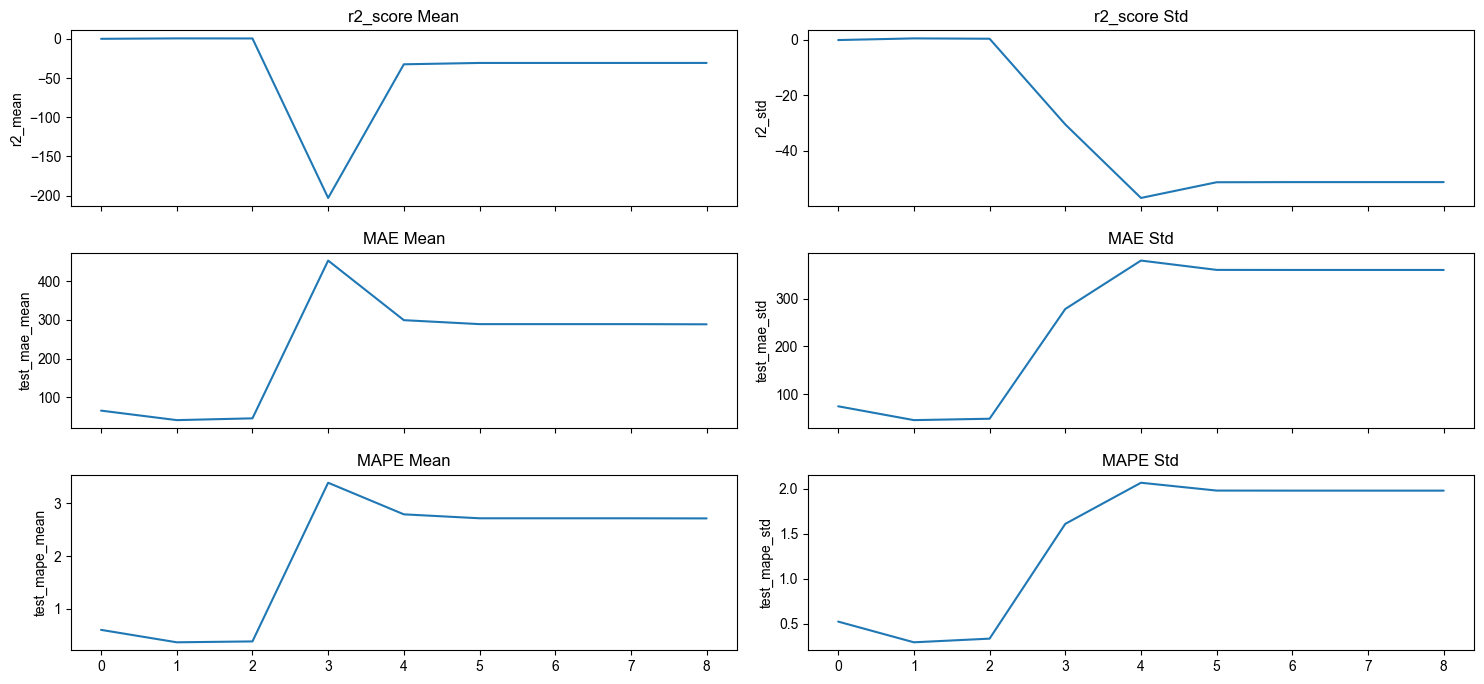

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(15, 7), sharex=True)
sns.set(style="darkgrid")

titles = ['r2_score Mean', 'r2_score Std', 'MAE Mean', 'MAE Std', 'MAPE Mean', 'MAPE Std']
metrics = ['r2_mean', 'r2_std', 'test_mae_mean', 'test_mae_std', 'test_mape_mean', 'test_mape_std']

for i in range(6):
    sns.lineplot(x=range(len(final_scores_2[metrics[i]])), y=final_scores_2[metrics[i]], ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(titles[i])

plt.tight_layout()
plt.show()

- The R-squared metric increases with the degree of the polynomial model.
- The MAE and MAPE metrics decrease with the degree of the polynomial model. 
- The standard deviation of all three metrics increases with the degree of the polynomial model.